In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [127]:
#load data from the csv file into a pandas dataframe
df = pd.read_csv(r'C:/Users/rielp/Downloads/rice_beef_coffee_price_changes.csv')

#check the structure of the data
#df

#rename Price_coffee_infl to Price_change_%
df.rename({'Price_coffee_infl': 'Price_change_%'}, axis=1, inplace=True)

#drop NaN values if predictive analytics are not going to be used [it will be used later]
#df.dropna()

df

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_change_%
0,1992,Feb,2.52,0.28,1.51,89.59,0.53,4.78,2.86
1,1992,Mar,2.45,0.28,1.55,89.59,0.53,4.64,2.94
2,1992,Apr,2.38,0.28,1.45,89.59,0.53,4.51,2.75
3,1992,May,2.38,0.27,1.34,89.59,0.51,4.51,2.54
4,1992,Jun,2.33,0.27,1.30,89.59,0.51,4.42,2.46
...,...,...,...,...,...,...,...,...,...
355,2021,Sep,5.66,0.40,4.97,-1.29,0.39,5.59,4.91
356,2021,Oct,5.70,0.40,5.31,-1.29,0.39,5.63,5.24
357,2021,Nov,5.95,0.40,5.71,-1.29,0.39,5.87,5.64
358,2021,Dec,5.95,0.40,5.91,-1.29,0.39,5.87,5.83


In [148]:
#create a dataframe for only the coffee related data
coffee_only_df = df[['Year', 'Month', 'Price_coffee_kilo', 'Price_change_%']]

#check the new dataframe
coffee_only_df

,Year,Month,Price_coffee_kilo,Price_change_%
0,1992,Feb,1.51,2.86
1,1992,Mar,1.55,2.94
2,1992,Apr,1.45,2.75
3,1992,May,1.34,2.54
4,1992,Jun,1.30,2.46
...,...,...,...,...
355,2021,Sep,4.97,4.91
356,2021,Oct,5.31,5.24
357,2021,Nov,5.71,5.64
358,2021,Dec,5.91,5.83


In [150]:
#price change takes into account the coffee, beef and rice columns
#recalculate the price changes values for just the coffee values

#first place the price values in a list
coffee_price_list = []
for i in coffee_only_df['Price_coffee_kilo']:
    coffee_price_list.append(i)
    
#use a for loop to calculate the price difference
v = np.diff(coffee_price_list) #use numpy to get the difference in the values in the list


coffee_price_diff = []
for i, j in zip(v, coffee_price_list):
   a = round(i/j*100,2)
   coffee_price_diff.append(a)
    
#add the first value of the price change value [no values before Feb 1992, goig to assume that it is correct]
coffee_price_diff.insert(0, df['Price_change_%'].iloc[0])

coffee_price_diff

[2.86,
 2.65,
 -6.45,
 -7.59,
 -2.99,
 -1.54,
 -8.59,
 0.0,
 16.24,
 8.82,
 14.86,
 -10.0,
 -2.61,
 -6.04,
 -8.57,
 7.03,
 0.73,
 14.49,
 7.59,
 4.71,
 -5.06,
 2.37,
 3.47,
 -2.79,
 6.32,
 3.78,
 4.17,
 34.5,
 17.47,
 52.85,
 -8.49,
 10.63,
 -9.0,
 -9.44,
 -7.69,
 2.42,
 -1.84,
 5.88,
 -3.03,
 -1.82,
 -9.55,
 -5.87,
 5.3,
 -12.43,
 -5.07,
 -1.78,
 -15.22,
 4.27,
 12.3,
 -2.92,
 2.26,
 4.78,
 -2.81,
 -2.53,
 2.96,
 -5.76,
 4.58,
 0.0,
 -5.84,
 13.57,
 26.62,
 15.63,
 6.29,
 29.17,
 -16.98,
 -14.11,
 0.24,
 -0.48,
 -11.69,
 -4.59,
 10.76,
 0.26,
 0.26,
 -11.45,
 -4.89,
 -8.16,
 -9.54,
 -5.82,
 5.02,
 -9.19,
 -2.02,
 6.2,
 0.78,
 -3.86,
 -6.43,
 -0.43,
 -3.02,
 8.89,
 -3.67,
 -11.44,
 -3.83,
 -7.46,
 11.83,
 20.19,
 9.6,
 -10.58,
 -6.94,
 -2.63,
 -5.86,
 -0.48,
 -8.17,
 1.05,
 -11.92,
 -1.76,
 1.2,
 -6.51,
 -7.59,
 -0.68,
 2.07,
 -0.68,
 -0.68,
 4.79,
 -7.84,
 -8.51,
 2.33,
 -3.03,
 -3.13,
 4.84,
 -3.85,
 2.4,
 1.56,
 9.23,
 1.41,
 -6.25,
 -4.44,
 -3.1,
 -4.0,
 11.67,
 8.21,
 6.21,
 -8.44

In [151]:
#change the variables type to that of the pandas price column 
#check column data type
coffee_only_df['Price_change_%'].dtype

dtype('float64')

In [152]:
#change list variables data type to float64
coffee_price_diff_float64 = list(np.array(coffee_price_diff, dtype = 'float64'))

#check random indexes for data type
#coffee_price_diff_float64[0].dtype
#coffee_price_diff_float64[22].dtype
#coffee_price_diff_float64[100].dtype

In [153]:
#replace the values in the price_change column with the calculated price changes
coffee_only_df['Price_change_%'] = coffee_price_diff_float64

C:\Users\rielp\AppData\Local\Temp\ipykernel_432\2601705429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_only_df['Price_change_%'] = coffee_price_diff_float64


In [173]:
# check if the changes were made in the dataframe

coffee_only_df[coffee_only_df['Year']==2006]

,Year,Month,Price_coffee_kilo,Price_change_%
167,2006,Jan,2.74,17.60
168,2006,Feb,2.63,-4.01
169,2006,Mar,2.51,-4.56
170,2006,Apr,2.54,1.20
171,2006,May,2.41,-5.12
172,2006,Jun,2.27,-5.81
173,2006,Jul,2.31,1.76
174,2006,Aug,2.46,6.49
175,2006,Sep,2.42,-1.63
176,2006,Oct,2.44,0.83


In [176]:
#place the average price change and price per kg in a pivot table
pd.pivot_table(coffee_only_df, index=('Year'), values=('Price_coffee_kilo', 'Price_change_%'), aggfunc=np.average)

,Price_change_%,Price_coffee_kilo
Year,,
1992,1.660909,1.391818
1993,0.675833,1.560000
1994,7.692500,3.308333
1995,-3.584167,3.332500
1996,0.940833,2.695000
1997,4.535833,4.167500
1998,-3.212500,2.982500
1999,0.864167,2.290000
2000,-5.015833,1.921667


In [216]:
# gain the average price and inflation rate of coffee for each year
# use the groupby method and then calculate the mean
#as_index=False

price_per_year = coffee_only_df.groupby(['Year'],as_index=False)['Price_coffee_kilo'].mean()
avg_price_change_per_year = coffee_only_df.groupby(['Year'],as_index=False)['Price_change_%'].mean()

#check values for each
#price_per_year

Year                 2022.00
Price_coffee_kilo       5.98
dtype: float64

Text(0.5, 1.0, 'Average price per kg coffee from 1992 to 2022.')

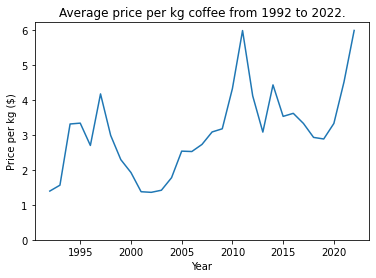

In [215]:
price_per_year.set_index('Year').plot(legend=None)
plt.ylabel('Price per kg ($)')
plt.ylim(0,)
plt.xlabel('Year')
plt.title('Average price per kg coffee from 1992 to 2022.')

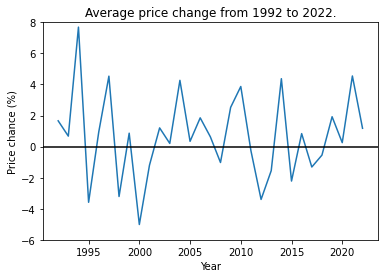

In [214]:
# use a line graph to illustate the price change %

avg_price_change_per_year.set_index('Year').plot(legend=None)
plt.ylabel('Price chance (%)')
plt.ylim(-6,8) #min and max for the data set
plt.xlabel('Year')
plt.title('Average price change from 1992 to 2022.')
plt.axhline(y = 0, color = 'black', linestyle = '-') #illustrate 0% line for better insight into price changes

In [ ]:
# predict what the average price and price change will be for 2022

In [218]:
#first calculate coefecient
coef = np.polyfit(price_per_year['Year'], price_per_year['Price_coffee_kilo'], 1)

coef

array([ 7.41106427e-02, -1.45656534e+02])

In [225]:
#predict what the average price in 2022 will be [only Jan 2022 data is included]
#based on the assumption that it will follow past trends

coffee_2022_predicted_price = round(np.polyval(coef, 2022),3)
coffee_2022_predicted_price

4.195